# Esempi di utilizzo degli output del codice

il montecarlo SDE produce in output delle distribuzioni di pesi statistici che rappresentano, largo circa, la probabilitià con cui una particella che alla Terra (o alla posizione studiata) ha una energia/rigidità T alla sua origine al bordo dell'eliosfera aveva una energia/Rigidità Tb.

questo peso va poi convoluto con il LIS (spettro locale intersellare, al di fuori dell'eliosfera) al fine di avere il flusso modulato.



In [32]:
# librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Librerie/article.mplstyle')

## Premesse

sebbene la cosa più corretta sarebbe quella di fare la convoluzione direttamente nel codice montecarlo, questo non è desiderabile in quanto il LIS 
1. il LIS è di fatto un parametro libero del modello, anche se il suo valore è determinato da altri modelli
2. il lis è difficile che sia esprimibile con una funzione analitica ma è fornito come una tabella energia-flusso, tabella di testo o fits file generato dal programma [galprop](https://galprop.stanford.edu/)
3. ogni isotopo ha il suo lis, dato che le misure di ioni cosmici spesso sono composte da almeno 2 isotopi, in ogni caso occorre unire il risultato di due montecarlo per avere una risultato corretto.

In [6]:
# folder con le librerie di supporto
import sys
sys.path.append('Librerie/')

### LIS
Lo spettro locale interstellare (Local Interstellar Spectrum - LIS) è lo spettro dei raggi cosmici all'esterno dell'eliosfera. Usiamo varie formulazioni:
1. formula analitica (imprecisa)
2. file testo a due colonne (ne serve uno per ogni isotopo)
2. file fits da galprop (contiene al suo interno tutti gli isotopi compresi quelli prodotti durante la propagazione)

In [60]:
# load GALPROP LIS
from LIS import LoadLIS
LIS_Tkin, LIS_Flux = LoadLIS('Librerie/esempi/GALPROP_LIS_Esempio')
    
# a) Print the range of energies in LIS_Tkin and the number of bins
print("the GALPROP FILE contains:")
print(f"Energy range: {LIS_Tkin[0]} - {LIS_Tkin[-1]} GeV/n")
print(f"Number of bins: {len(LIS_Tkin)}")

# b) Print the keys of LIS_Flux in a table format
print("avalable isotopes:")
print("Z\tA\tK")
for Z in LIS_Flux:
    for A in LIS_Flux[Z]:
        for K in LIS_Flux[Z][A]:
            print(f"{Z}\t{A}\t{K}")

the GALPROP FILE contains:
Energy range: 0.001 - 999785.023003356 GeV/n
Number of bins: 216
avalable isotopes:
Z	A	K
-1	0	0
-1	1	0
1	2	0
1	1	0
2	3	0
2	4	0
3	6	0
3	7	0
4	7	0
4	9	0
4	10	0
5	10	0
5	11	0
6	12	0
6	13	0
7	14	0
7	15	0
8	16	0
8	17	0
8	18	0
9	19	0
10	20	0
10	21	0
10	22	0
11	23	0
12	24	0
12	25	0
12	26	0
13	26	1
13	26	0
13	27	0
14	28	0
14	29	0
14	30	0
15	31	0
16	32	0
16	33	0
16	34	0
16	36	0
17	35	0
17	36	1
17	36	0
17	37	0
18	36	0
18	37	0
18	38	0
18	40	0
19	39	0
19	40	0
19	41	0
20	40	0
20	41	1
20	41	0
20	42	0
20	43	0
20	44	0
20	46	0
20	48	0
21	45	0
22	44	0
22	46	0
22	47	0
22	48	0
22	49	0
22	50	0
23	49	0
23	50	0
23	51	0
24	50	0
24	51	0
24	52	0
24	53	0
24	54	0
25	53	1
25	53	0
25	54	0
25	55	0
26	54	0
26	55	0
26	56	0
26	57	0
26	58	0
26	60	0
27	57	0
27	59	0
28	56	0
28	58	0
28	59	1
28	59	0
28	60	0
28	61	0
28	62	0
28	64	0


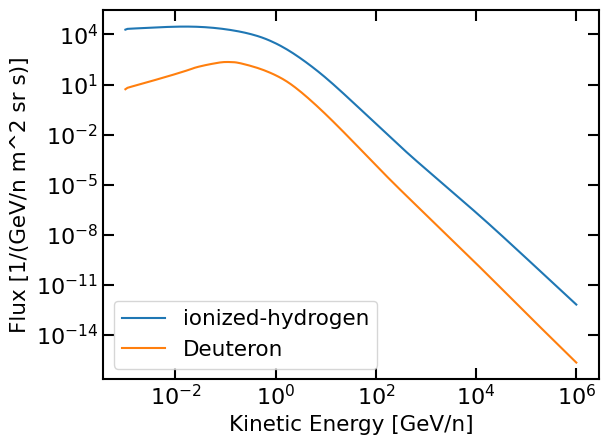

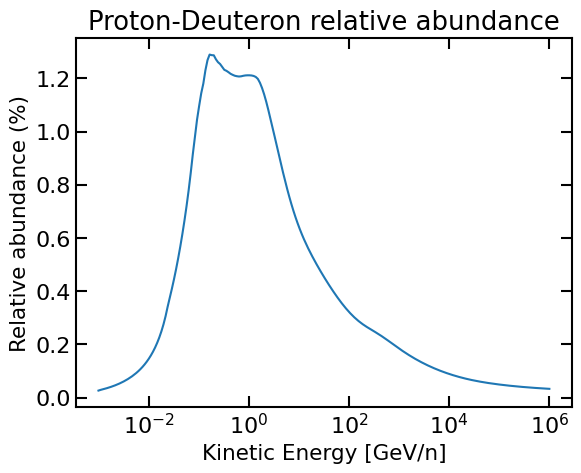

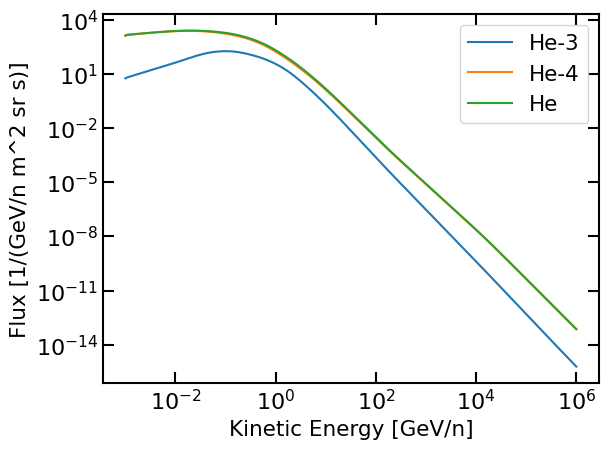

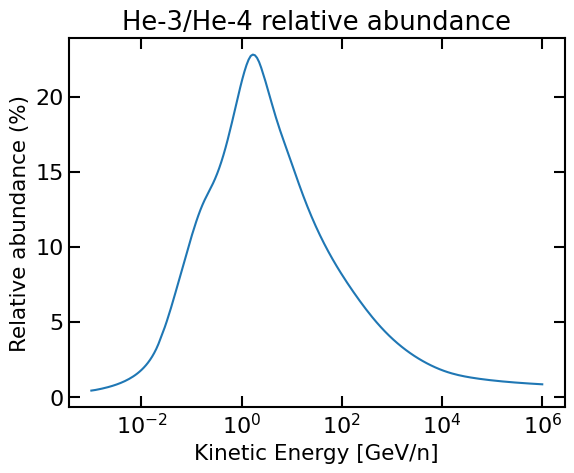

In [70]:
# mostra il LIS per un paio di isotopi
from LIS import GetLIS
IncludeSecondaries = True
# Proton LIS is composed by 2 isotopes: ionized-hydrogen and deuteron
Z, A, K = 1, 1, 0 # hydrogen
p_energy_bins, p_lis_spectrum = GetLIS((LIS_Tkin, LIS_Flux), Z, A, K, IncludeSecondaries)
Z, A, K = 1, 2, 0 # deuteron
d_energy_bins, d_lis_spectrum = GetLIS((LIS_Tkin, LIS_Flux), Z, A, K, IncludeSecondaries)

# plot LIS  
plt.figure()
plt.loglog(p_energy_bins, p_lis_spectrum, label='ionized-hydrogen')
plt.loglog(d_energy_bins, d_lis_spectrum, label='Deuteron')
plt.xlabel('Kinetic Energy [GeV/n]')
plt.ylabel('Flux [1/(GeV/n m^2 sr s)]')
plt.legend()
plt.show()

# plot relative abundance
plt.figure()
plt.plot(p_energy_bins, d_lis_spectrum/p_lis_spectrum*100)
plt.xscale('log')
plt.ylabel('Relative abundance (%)')
plt.xlabel('Kinetic Energy [GeV/n]')
plt.title('Proton-Deuteron relative abundance')
plt.show()

#################################
#################################
# Helium LIS is composed by 2 isotopes: He-3 and He-4
Z, A, K = 2, 3, 0 # He-3
He3_energy_bins, He3_lis_spectrum = GetLIS((LIS_Tkin, LIS_Flux), Z, A, K, IncludeSecondaries)
Z, A, K = 2, 4, 0 # He-4
He4_energy_bins, He4_lis_spectrum = GetLIS((LIS_Tkin, LIS_Flux), Z, A, K, IncludeSecondaries)

# plot LIS  
plt.figure()
plt.loglog(He3_energy_bins, He3_lis_spectrum, label='He-3')
plt.loglog(He4_energy_bins, He4_lis_spectrum, label='He-4')
plt.loglog(He3_energy_bins, He3_lis_spectrum+He4_lis_spectrum, label='He')
plt.xlabel('Kinetic Energy [GeV/n]')
plt.ylabel('Flux [1/(GeV/n m^2 sr s)]')
plt.legend()
plt.show()

# plot relative abundance
plt.figure()
plt.plot(He3_energy_bins, He3_lis_spectrum/He4_lis_spectrum*100)
plt.xscale('log')
plt.ylabel('Relative abundance (%)')
plt.xlabel('Kinetic Energy [GeV/n]')
plt.title('He-3/He-4 relative abundance')
plt.show()



### Energia Vs Rigidità

La rigidità di particella (o rigidità magnetica) è la resistenza che una particella carica pone alla curvatura dentro un campo magnetico. più è alta la rigidità, più difficilmente la sua traiettoria verrà curvata dal campo magnetico

La formula della rigidità magnetica $R$ è data da:

$$R = \frac{pc}{Ze}$$

dove $pc$ è il momento relativistico della particella e $Ze$ è la carica elettrica della particella.

nella libreria `utils` sono riportare la formule per convertire da una all'altra

la convenzione tipicamente usata nei codici è
- `T` rappresenta l'energia cinetica per nucleone in GeV/nucleone o GeV/n
- `T0` la massa a riposto della particella in GeV/n
- `P` la rigidità della particella in GV
- `P0` è usato come parametro nelle formule e indica una rigidità di riferimento (in GV)
- `R` è un raggio in AU

sebbene siano cose diverse, nel testo Rigidità e Energia sono a volte usati come sinonimi dato che spesso il discorso che vale per una, vale anche per l'altra quantità.

il fenomeno della modulazione solare è rilevante sotto i ~30 GV le energie superiori vengono usate perlopiù per verificare la corretta normalizzazione dei LIS rispetto ai dati sperimentali. i dati di AMS-02 non hanno valori sotto 1GV.

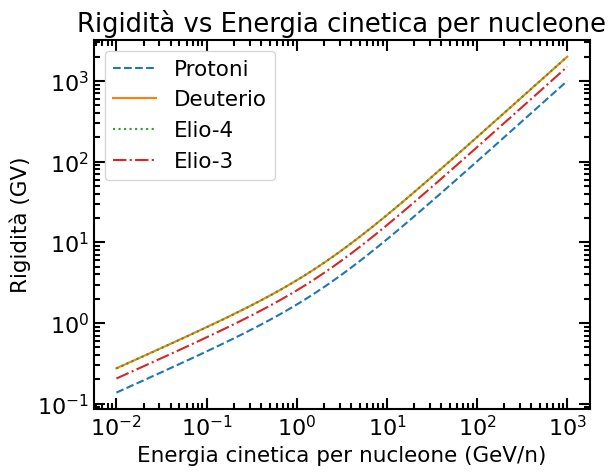

In [36]:
# conversione Energia cinetica per nucleone -> Rigidità
from utils import Rigidity,Energy

T_array = np.logspace(-2,3,100)
P_protoni = Rigidity(T_array)
P_deuterio = Rigidity(T_array,MassNumber=2)
P_Helium = Rigidity(T_array,MassNumber=4,Z=2)
P_He3 = Rigidity(T_array,MassNumber=3,Z=2)
plt.figure()
plt.plot(T_array, P_protoni,"--", label='Protoni')
plt.plot(T_array, P_deuterio, label='Deuterio')
plt.plot(T_array, P_Helium,":", label='Elio-4')
plt.plot(T_array, P_He3,"-.", label='Elio-3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia cinetica per nucleone (GeV/n)')
plt.ylabel('Rigidità (GV)')
plt.title('Rigidità vs Energia cinetica per nucleone')
plt.legend()
plt.show()

### Composizione isotopica

In [13]:
import Particle_Library as PL
Ion = "Proton"
IsotopesList=PL.findKey(Ion, PL.ISOTOPES)
print(f"Isotopes of {Ion}")
print(f"{len(IsotopesList)}")
if IsotopesList:
    print(f"{'Z':<5} {'A':<5} {'T0[GeV/n]':<15} {'Name':<10}")
    for isotope in IsotopesList:
        print(f"{isotope[0]:<5} {isotope[1]:<5} {isotope[2]:<15} {isotope[3]:<10}")

Isotopes of Proton
2
Z     A     T0[GeV/n]       Name      
1.0   1.0   0.938272        Proton    
1.0   2.0   0.938272        Deuteron  


In [19]:
#list of available ions and isotopes

print(f"Actually the available ions are:")
for key in Isotopes_dict.keys():
    print(f"{key:10}: {len(Isotopes_dict[key])} isotopes")

Actually the available ions are:
Electron  : 1 isotopes
Antiproton: 1 isotopes
Positron  : 1 isotopes
Proton    : 2 isotopes
H1        : 1 isotopes
H2        : 1 isotopes
Helium    : 2 isotopes
He4       : 1 isotopes
He3       : 1 isotopes
Lithium   : 2 isotopes
Li6       : 1 isotopes
Li7       : 1 isotopes
Beryllium : 3 isotopes
Be10      : 1 isotopes
Be9       : 1 isotopes
Be7       : 1 isotopes
Boron     : 2 isotopes
B10       : 1 isotopes
B11       : 1 isotopes
Carbon    : 2 isotopes
C12       : 1 isotopes
C13       : 1 isotopes
C14       : 1 isotopes
Nitrogen  : 2 isotopes
N14       : 1 isotopes
N15       : 1 isotopes
Oxygen    : 3 isotopes
O16       : 1 isotopes
O17       : 1 isotopes
O18       : 1 isotopes
Fluorine  : 1 isotopes
F19       : 1 isotopes
F18       : 1 isotopes
Neon      : 3 isotopes
Ne20      : 1 isotopes
Ne21      : 1 isotopes
Ne22      : 1 isotopes
Sodium    : 1 isotopes
Na23      : 1 isotopes
Magnesium : 3 isotopes
Mg24      : 1 isotopes
Mg25      : 1 isotopes
M

## Code output

L'output più preciso dovrebbe essere una lista di punti a valori (T,Tb) dove T è l'energia/Rigidità di inizio propagazione della quasi particella e Tb è l'energia/rigidità al boundary

dato che file di questo tipo diventano eccessivamente lunghi, dopo la fase di propagazione il risultato viene binnato a creare un istrogramma che viene poi salvato come file di testo.

di seguito un esempio di file di output del montecarlo, la sua lettura e conversione in dizionario e il grafico di un alcune energie

First 10 lines of Librerie/esempi/Deuteron_Simulation_Output_Example.dat
------ file begin (first 10 lines) ------
# HelMod-4-CUDA v3.0
# Number of Input energies;
72
######  Bin 0
# Egen, Npart Gen., Npart Registered, Nbin output, log10(lower edge bin 0), Bin amplitude (in log scale)
0.144300 6080 6080 337 -0.842582 0.003697
# output distribution
0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.714846e+00 8.540475e-01 1.696808e+00 8.413424e-01 1.679674e+00 1.669644e+00 8.277851e-01 0.000000e+00 2.455461e+00 1.626272e+00 0.000000e+00 3.217025e+00 3.193246e+00 3.170070e+00 1.580137e+00 1.564173e+00 3.121404e+00 3.098250e+00 3.076723e+00 2.295048e+00 6.841944e+00 3.773428e+00 3.748053e+00 8.207624e+00 

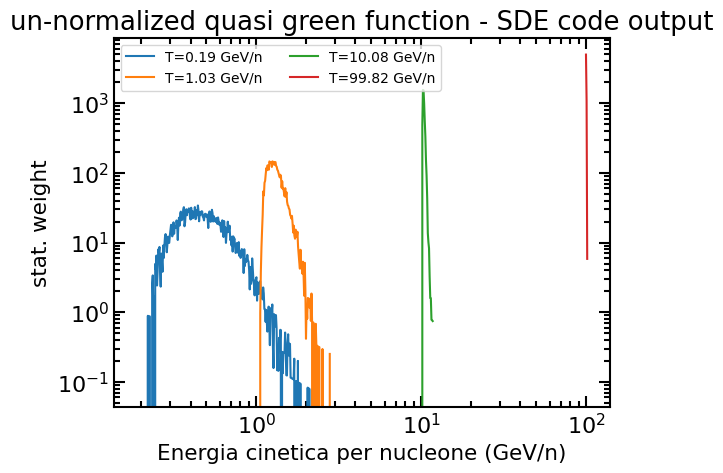

In [55]:
# esempi di output
from Simulation_Output_handler import LoadSimulationOutput
FileName = "Librerie/esempi/Deuteron_Simulation_Output_Example.dat"
print(f"First 10 lines of {FileName}")
print("------ file begin (first 10 lines) ------")
with open(FileName, 'r') as file:
    for _ in range(10):
        print(file.readline().strip())
print("------ file continue (not showed) ------")

# leggi il file di output e convertilo in un dizionario
SimulationOutput,Warnings = LoadSimulationOutput(FileName)
print(f"## Output Letto...")
if len(Warnings)>0:
    print("Warnings:")    
    print(Warnings)
else:
    print("No warnings")

# stampa lista energie simulate
# print(SimulationOutput['InputEnergy'])
# seleziona gli indici in SimulationOutput['InputEnergy'] con valore più vicino a 0.2, 1 e 10
target_energies = [0.2, 1, 10,100]
indices = [np.abs(SimulationOutput['InputEnergy'] - energy).argmin() for energy in target_energies]
plt.figure()
for iEnergy in indices:
    plt.plot(SimulationOutput['OuterEnergy'][iEnergy],SimulationOutput['BounduaryDistribution'][iEnergy],
             label=f"T={SimulationOutput['InputEnergy'][iEnergy]:.2f} GeV/n")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia cinetica per nucleone (GeV/n)')
plt.ylabel('stat. weight')
plt.title('un-normalized quasi green function - SDE code output')
plt.legend(loc='upper left',fontsize='10',ncols=2)
plt.show()

## Calcolo dello spettro

